In [1]:
import numpy as np
import pandas as pd
import gzip
import matplotlib.pyplot as plt
import seaborn as sns

DATASET = 'reviews_Video_Games_5.json.gz'

In [2]:
# Read data into dataframe
# http://jmcauley.ucsd.edu/data/amazon/

def parse(path):
  g = gzip.open(path, 'rb')
  for l in g:
    yield eval(l)

def getDF(path):
  i = 0
  df = {}
  for d in parse(path):
    df[i] = d
    i += 1
  return pd.DataFrame.from_dict(df, orient='index')


In [3]:
df = getDF(DATASET)
df.head()

,reviewerID,asin,reviewerName,helpful,reviewText,overall,summary,unixReviewTime,reviewTime
0,A2HD75EMZR8QLN,0700099867,123,"[8, 12]",Installing the game was a struggle (because of...,1.0,Pay to unlock content? I don't think so.,1341792000,"07 9, 2012"
1,A3UR8NLLY1ZHCX,0700099867,"Alejandro Henao ""Electronic Junky""","[0, 0]",If you like rally cars get this game you will ...,4.0,Good rally game,1372550400,"06 30, 2013"
2,A1INA0F5CWW3J4,0700099867,"Amazon Shopper ""Mr.Repsol""","[0, 0]",1st shipment received a book instead of the ga...,1.0,Wrong key,1403913600,"06 28, 2014"
3,A1DLMTOTHQ4AST,0700099867,ampgreen,"[7, 10]","I got this version instead of the PS3 version,...",3.0,"awesome game, if it did not crash frequently !!",1315958400,"09 14, 2011"
4,A361M14PU2GUEG,0700099867,"Angry Ryan ""Ryan A. Forrest""","[2, 2]",I had Dirt 2 on Xbox 360 and it was an okay ga...,4.0,DIRT 3,1308009600,"06 14, 2011"


In [4]:
# Convert review time to year
def get_year(s):
    year = s.split(",")[-1]
    return int(year)
df['reviewTime'] = df['reviewTime'].astype(str).map(get_year)

In [5]:
df = df.loc[:,['helpful','reviewText','overall','reviewTime']]
df['helpful_votes'] = df['helpful'].map(lambda x : x[0])
df['total_votes'] = df['helpful'].map(lambda x : x[1])
df.head()

,helpful,reviewText,overall,reviewTime,helpful_votes,total_votes
0,"[8, 12]",Installing the game was a struggle (because of...,1.0,2012,8,12
1,"[0, 0]",If you like rally cars get this game you will ...,4.0,2013,0,0
2,"[0, 0]",1st shipment received a book instead of the ga...,1.0,2014,0,0
3,"[7, 10]","I got this version instead of the PS3 version,...",3.0,2011,7,10
4,"[2, 2]",I had Dirt 2 on Xbox 360 and it was an okay ga...,4.0,2011,2,2


In [6]:
# Check if there's any missing values
df.isnull().sum()

helpful          0
reviewText       0
overall          0
reviewTime       0
helpful_votes    0
total_votes      0
dtype: int64

In [7]:
df.describe()

,overall,reviewTime,helpful_votes,total_votes
count,231780.000000,231780.000000,231780.000000,231780.000000
mean,4.086397,2009.980024,4.091432,6.252563
std,1.202330,3.690229,36.429984,41.355951
min,1.000000,1999.000000,0.000000,0.000000
25%,4.000000,2008.000000,0.000000,0.000000
50%,5.000000,2011.000000,1.000000,1.000000
75%,5.000000,2013.000000,2.000000,4.000000
max,5.000000,2014.000000,10279.000000,10533.000000


In [8]:
# Only consider reviews with votes
data = df.loc[df['total_votes'] >0]
data.shape

(139855, 6)

In [9]:
data.groupby('overall').count()

,helpful,reviewText,reviewTime,helpful_votes,total_votes
overall,,,,,
1.0,13239,13239,13239,13239,13239
2.0,11021,11021,11021,11021,11021
3.0,19723,19723,19723,19723,19723
4.0,32278,32278,32278,32278,32278
5.0,63594,63594,63594,63594,63594


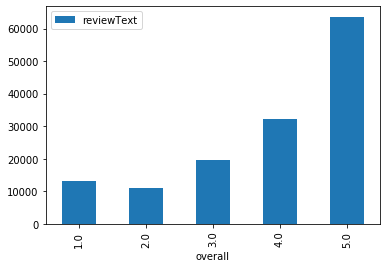

In [10]:
# Plot number of reviews vs overall ratings
data.groupby('overall').count().loc[:,['reviewText']].plot.bar()

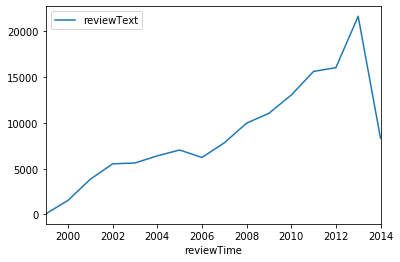

In [11]:
# Plot number of reviews for every year from 1996 to 2014
data.groupby('reviewTime').count().loc[:,['reviewText']].plot.line()

In [12]:
# Calculate review's length, sentence count, word count
import re, string
def count_word(w):
    wordsep = re.compile(r'[%s\s]+' % re.escape(string.punctuation))
    word = wordsep.split(w)
    return len(word)

def count_sentence(s):
    sentence = re.split(r'[!?]+|(?<!\.)\.(?!\.)',s)
    return len(sentence)

data['review_len'] = data['reviewText'].str.len()
data['sentence_count'] = data['reviewText'].astype(str).map(count_sentence)
data['word_count'] = data['reviewText'].astype(str).map(count_word)
data.head()

/Users/phuongtruong/opt/anaconda3/lib/python3.7/site-packages/ipykernel_launcher.py:12: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: http://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  if sys.path[0] == '':
/Users/phuongtruong/opt/anaconda3/lib/python3.7/site-packages/ipykernel_launcher.py:13: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: http://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  del sys.path[0]
/Users/phuongtruong/opt/anaconda3/lib/python3.7/site-packages/ipykernel_launcher.py:14: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,c

,helpful,reviewText,overall,reviewTime,helpful_votes,total_votes,review_len,sentence_count,word_count
0,"[8, 12]",Installing the game was a struggle (because of...,1.0,2012,8,12,779,14,151
3,"[7, 10]","I got this version instead of the PS3 version,...",3.0,2011,7,10,3489,25,644
4,"[2, 2]",I had Dirt 2 on Xbox 360 and it was an okay ga...,4.0,2011,2,2,294,7,63
6,"[11, 13]",Loved playing Dirt 2 and I thought the graphic...,5.0,2011,11,13,431,5,85
7,"[1, 4]",I can't tell you what a piece of dog**** this ...,1.0,2012,1,4,728,10,145


In [13]:
# Helpfulness of reviews, threshold = 0.6
data['helpful'] = data['helpful_votes']/data['total_votes'] >=0.6
data['helpful'] = (data['helpful'] > 0).astype(int)
data.head()

/Users/phuongtruong/opt/anaconda3/lib/python3.7/site-packages/ipykernel_launcher.py:2: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: http://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  
/Users/phuongtruong/opt/anaconda3/lib/python3.7/site-packages/ipykernel_launcher.py:3: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: http://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  This is separate from the ipykernel package so we can avoid doing imports until


,helpful,reviewText,overall,reviewTime,helpful_votes,total_votes,review_len,sentence_count,word_count
0,1,Installing the game was a struggle (because of...,1.0,2012,8,12,779,14,151
3,1,"I got this version instead of the PS3 version,...",3.0,2011,7,10,3489,25,644
4,1,I had Dirt 2 on Xbox 360 and it was an okay ga...,4.0,2011,2,2,294,7,63
6,1,Loved playing Dirt 2 and I thought the graphic...,5.0,2011,11,13,431,5,85
7,0,I can't tell you what a piece of dog**** this ...,1.0,2012,1,4,728,10,145


In [14]:
# Number of helpful reviews
data.loc[data['helpful']==1].shape

(81877, 9)

In [15]:
# Number of unhelpful reviews
data.loc[data['helpful']==0].shape

(57978, 9)

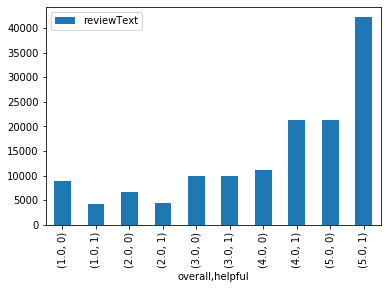

In [16]:
# Compare the number of helpful and unhelpful reviews in each overall rating
data.groupby(['overall','helpful']).count().loc[:,['reviewText']].plot.bar()

In [17]:
# Average length of helpful and unhelpful reviews
data.groupby(['helpful']).mean().loc[:,['review_len', 'sentence_count', 'word_count']]

,review_len,sentence_count,word_count
helpful,,,
0,1042.318052,12.338370,198.816016
1,1743.893413,19.000391,327.421388


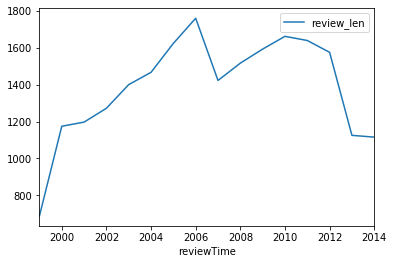

In [18]:
# Plot average reviews' length from 1996 to 2014
data.groupby(['reviewTime']).mean().loc[:,['review_len']].plot.line()

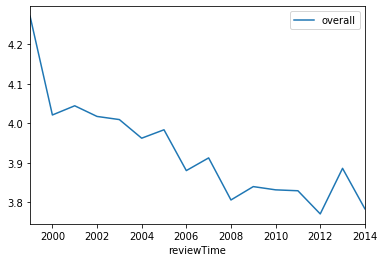

In [19]:
# Plot average ratings from 1996 to 2014
data.groupby(['reviewTime']).mean().loc[:,['overall']].plot.line()

In [20]:
# Correlation between features and label
data.drop(columns=['reviewTime','helpful_votes','total_votes']).corr()

,helpful,overall,review_len,sentence_count,word_count
helpful,1.000000,0.234972,0.192807,0.185062,0.191305
overall,0.234972,1.000000,0.015571,0.005233,0.014094
review_len,0.192807,0.015571,1.000000,0.937884,0.998675
sentence_count,0.185062,0.005233,0.937884,1.000000,0.940857
word_count,0.191305,0.014094,0.998675,0.940857,1.000000
